# Fitting data

You will often be collecting data in your work and then fitting a function to that data.
Maybe it's to create a generalizable model (e.g., machine learning), extract a property (e.g., the slope), or something else.
There are many way to do this in Python, and we'll begin by exploring on such technique.

## Summary of commands

In this exercise, we will demonstrate the following:
- [`np.polyfit()`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) - Construct a least squares polynomial fit.
- [`np.polyval()`](https://numpy.org/doc/stable/reference/generated/numpy.polyval.html) - Evaluate a fitted polynomial at specific values.

## Reynolds number

Reynolds number ($\text{Re}$) is a non-dimensional parameter frequently used in fluid mechanics:

$$ \text{Re} = \dfrac{VL}{\nu} $$

where 
- $V$ is the characteristic velocity of the flow.
- $\nu$ (Greek letter nu) is the kinematic viscosity.
- $L$ is the characteristic length scale of the flow (such as the length or the diameter of a body).

The Reynolds number indicates the relative importance of the viscous effects compared to the inertial effects. 
If the Reynolds number is low, viscous effects are predominant and if it's large, viscosity can be ignored.

Let's consider the force exerted on a sphere moving in the air. 
This drag force depends on the viscosity of the fluid, the velocity of the sphere and its dimension. 
Therefore, it is directly related to the Reynolds number. 
The drag force $F_{\mathrm{D}}$ can be expressed as follows:

$$ F_{\mathrm{D}} = \dfrac{1}{2} C_{\mathrm{D}} \rho V^2 \pi r^2 $$

where
- $\rho$ is the density of air.
- $r$ is the radius of the sphere.
- $V$ is the velocity of the sphere.
- $C_{\mathrm{D}}$ is the drag coefficient (non-dimensional).

In 1851, Stokes had demonstrated that the drag coefficient at low Reynolds numbers was inversely proportional to Re:

$$ C_{\mathrm{D}} = \dfrac{24}{\text{Re}} \quad \text{(low Re)} \quad (1) $$

A group of students have measured this coefficient for a sphere of radius $r$ in a wind tunnel.
Here are their results. 
Confirm that the data satisfies Stokes' law.

| $C_{\mathrm{D}}$ | Re |
| :-- | --: |
| 492 | 0.05875 |
| 256.2 | 0.1003 | 
| 169.8 | 0.1585 | 
| 58.88 | 0.4786 |
| 10.86 | 3.020  |

Taking the logarithm of Equation (1), we obtain:

$$ \ln(C_{\mathrm{D}}) = \ln(24) - \ln(\text{Re}) \quad (2) $$

To check whether Stokes’ law is satisfied, we can plot $\ln(C_{\mathrm{D}})$ vs. $\ln(\text{Re})$ and see whether the data points fall along a straight line.

## Part (a)

Create two vectors containing the logarithm of the experimental data, $\ln(C_{\mathrm{D}})$ and $\ln(\text{Re})$.

In [5]:
import numpy as np

CD = [492, 256.2, 169.8, 58.88, 10.86]
Re = [0.05875, 0.1003, 0.1585, 0.4786, 3.020]

lnCD = np.log(CD)
lnRe = np.log(Re)

## Part (b)

Find the line that best fits these points. 
Display its coefficients on the screen and compare them with the theoretical result.

Hints: 
- A line is degree 1.
- The `polyfit()` command returns a vector containing the coefficients of the polynomial: $\begin{bmatrix} a_n & \cdots & a_1 & a_0 \end{bmatrix}$ corresponding to $P(x) = a_n x^n + \cdots + a_1 x^1 + a_0$

In [10]:
popt = np.polyfit(lnRe, lnCD, 1)
display(popt)

print(f"Theory: -1 and {np.log(24)}")

array([-0.95445596,  3.40657985])

Theory: -1 and 3.1780538303479458


## Part (c)

In the same figure plot the experimental data, the best fit line, and the theoretical line. 
Add a legend.

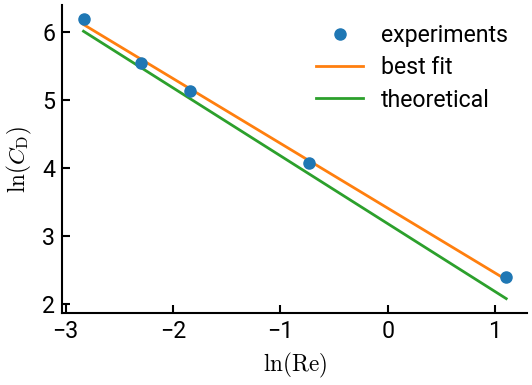

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(lnRe, lnCD, 'o', label="experiments")
lnRetheo = np.linspace(np.log(0.05875), np.log(3.020))
ax.plot(lnRetheo, np.polyval(popt, lnRetheo), lw=2, label="best fit", zorder=-5)
ax.plot(lnRetheo, np.log(24) - lnRetheo, lw=2, label="theoretical", zorder=-5)
ax.set(xlabel=r"$\ln(\mathrm{Re})$", ylabel=r"$\ln(C_{\mathrm{D}})$")
ax.legend()
plt.show()

```{tip}
Matplotlib layers lines on top of each other in the order they're plotted.
This is very sensible, but not always desirable.
To make sure the experimental data is on top, we sent the subsequent lines to a lower layer with the `zorder` parameter.
```